# **Red Neuronal de Clasificación - Titanic**

---

Conjunto de datos (dataset) - (https://www.kaggle.com/competitions/titanic/data)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf

Importamos el dataset descargado con la librería Pandas.

In [3]:
datos = pd.read_csv('titanic_train.csv')
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Veamos algunos datos estadísticos de los datos cargados.

In [4]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Grafiquemos la cantidad de personas que sobrevivieron y que no.

<Axes: xlabel='Survived', ylabel='count'>

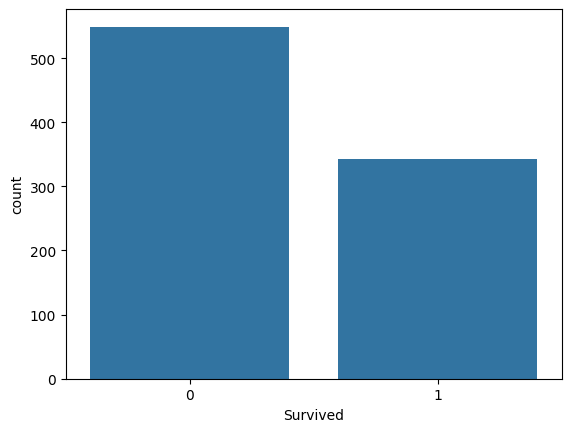

In [5]:
sb.countplot(x="Survived", data=datos)

Repitamos el gráfico, pero tomando en cuenta el género de los pasajeros.

<Axes: xlabel='Survived', ylabel='count'>

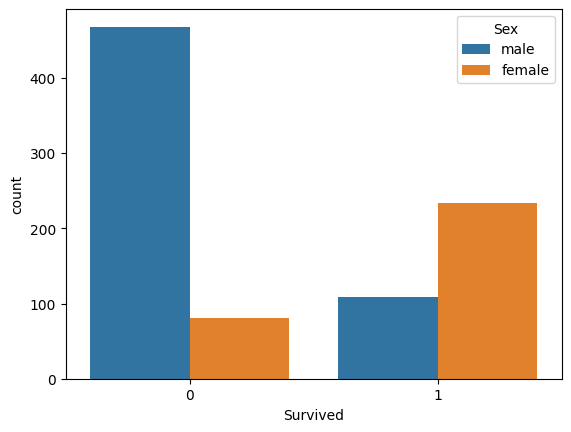

In [6]:
sb.countplot(x="Survived", data=datos, hue="Sex")

Continuando con el análisis, veamos si existen datos nulos.

In [7]:
datos.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Viendo la característica de la edad (Age), podemos encontrar alguna alternativa para reemplazar los 177 datos perdidos.

Una alternativa es emplear el promedio de la edad.

In [11]:
datos['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [10]:
datos['Age'].mean()

29.69911764705882

Reemplacemos los valores nulos con el promedio de la edad.

In [12]:
datos['Age'] = datos['Age'].fillna(datos['Age'].mean())
datos['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

Recordemos las características que tenian valores nulos.

In [13]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Podemos eliminar directamente la característica "Cabin", debido a que no podría influir mucho en el resultado.
Para la característica "Embarked", solamente podemos eliminar los dos registros con valores nulos.

In [14]:
datos = datos.drop(["Cabin"], axis=1)

In [15]:
datos = datos.dropna()

Verificamos que ya no existan valores nulos.

In [16]:
datos.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Si vemos nuevamente nuestros datos, podemos encontrar características que no ayudarán a nuestro modelo.

In [17]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Eliminemos las características "PassengerId", "Name" y "Ticket"

In [18]:
datos = datos.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
datos.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Antes de terminar con este análisis de los datos, necesitamos convertir los datos literales (letras) a valores numéricos. En este caso necesitamos codificar las características de "Sex" y "Embarked".

In [19]:
dummies_sex = pd.get_dummies(datos["Sex"], dtype=int, drop_first=True)
datos = datos.join(dummies_sex)
datos = datos.drop(["Sex"], axis=1)
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [20]:
dummies_embarked = pd.get_dummies(datos["Embarked"], dtype=int, drop_first=True)
datos = datos.join(dummies_embarked)
datos = datos.drop(["Embarked"], axis=1)
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Veamos una última relación con respecto a los pasajeros que sobrevivieron.

<Axes: xlabel='Survived', ylabel='count'>

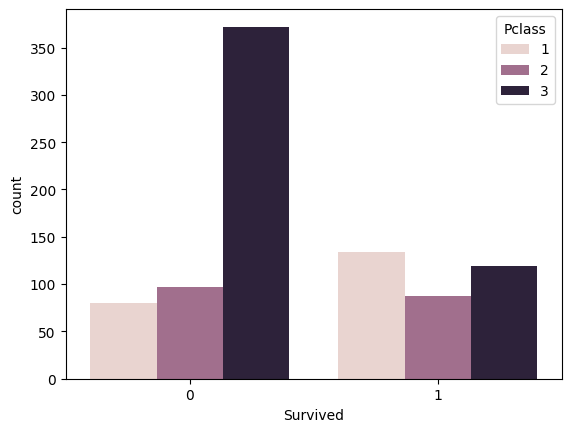

In [22]:
sb.countplot(x='Survived', data=datos, hue='Pclass')

Con nuestro análisis finalizado, comenzamos a separar las características de la etiqueta (lo que queremos predecir).

In [24]:
X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

Separamos los datos para realizar el Entrenamiento y la Evaluación.

In [25]:
from sklearn.model_selection import train_test_split
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.2)

Continuamos con la definición del modelo de Red Neuronal para el ejercicio.

In [77]:
seed = 42
tf.random.set_seed(seed)

modelo = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_ent.shape[1],)),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

Con el modelo estructurado, comenzamos con el entrenamiento, empleando los datos separados para este propósito.

In [78]:
TAMAÑO_LOTE = 64
entrenamiento = modelo.fit(X_ent, y_ent, epochs=500, batch_size=TAMAÑO_LOTE)

Epoch 1/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6585 - loss: 0.8498  
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.6778 - loss: 0.6363
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6956 - loss: 0.6029 
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7070 - loss: 0.6008 
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7198 - loss: 0.5909 
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.7192 - loss: 0.5944
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.7235 - loss: 0.5884
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.7258 - loss: 0.5870
Epoch 9/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.7194 - loss: 0.5837
Epoch 10/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.7270 - loss: 0.5816
Epoch 11/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7198 - loss: 0.5792 
Epoch 12/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

Realicemos algunas gráficas de nuestro modelo entrenado.

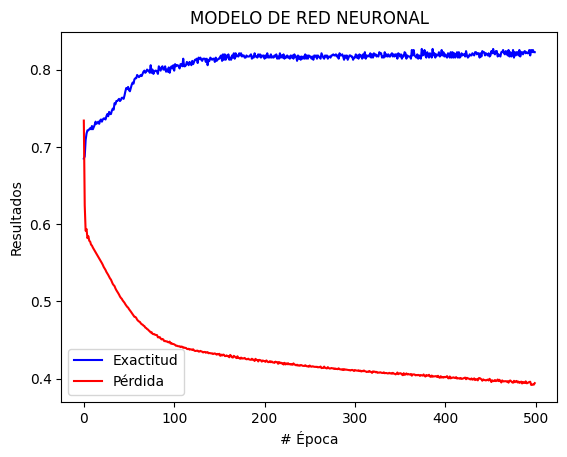

In [79]:
plt.xlabel("# Época")
plt.ylabel("Resultados")
plt.plot(entrenamiento.history["accuracy"], color="blue")
plt.plot(entrenamiento.history["loss"], color="red")
plt.legend(["Exactitud", "Pérdida"])
plt.title("MODELO DE RED NEURONAL")
plt.show()

Por lo visto, se tiene un modelo que no tiene un buen porcentaje de exactitud. Realicemos una predicción con este modelo.

In [82]:
nueva_persona = np.array([[2, 50, 0, 0, 26, 1, 0, 0]])
prediccion = modelo.predict([nueva_persona])
print(prediccion)
if prediccion[0] >= .5:
  print("Sobreviviste")
else:
  print("No sobreviviste")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.09884944]]
No sobreviviste


Usemos los datos de evaluación que separamos en bloques anteriores para poder evaluar el modelo de forma masiva.

In [52]:
def resultados(predicciones):
  res = [1 if prediccion >= 0.5 else 0 for prediccion in predicciones]
  return res

In [80]:
predicciones = modelo.predict(X_pru)
conversion_pred = resultados(predicciones)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [81]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(f"Exactitud: {accuracy_score(y_pru, conversion_pred)}")
matriz = pd.DataFrame(confusion_matrix(y_pru, conversion_pred), columns=["Predicción: NO", "Predicción: SI"], index=["Real: NO", "Real: SI"])
matriz

Exactitud: 0.8370786516853933


,Predicción: NO,Predicción: SI
Real: NO,98,6
Real: SI,23,51
